## Project | Deep Learning: Image Classification with CNN

# Data Preprocessing

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.utils import to_categorical
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
import seaborn as sns
from tensorflow.keras.regularizers import l2
from tensorflow.keras.applications import VGG16



In [ ]:
# Load CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()



A local file was found, but it seems to be incomplete or outdated because the auto file hash does not match the original value of 6d958be074577803d12ecdefd02955f39262c83c16fe9348329d7fe0b5c001ce so we will re-download the data.
170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 235s 1us/step


In [ ]:
# Normalize images to [0,1] range
X_train, X_test = X_train / 255.0, X_test / 255.0

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


In [ ]:
#Data Augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=20, width_shift_range=0.2,
    height_shift_range=0.2, horizontal_flip=True
)
datagen.fit(X_train)


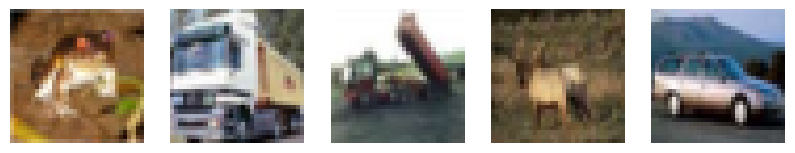

In [ ]:
# Visualizing Sample Images

fig, axes = plt.subplots(1, 5, figsize=(10, 3))
for i in range(5):
    axes[i].imshow(X_train[i])
    axes[i].axis("off")
plt.show()


## Model Architecture

In [ ]:
# Building the CNN Model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

# Define improved CNN model with regularization
model = Sequential([
    Conv2D(64, (3,3), activation='relu', padding='same', input_shape=(32, 32, 3), kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Conv2D(64, (3,3), activation='relu', padding='same', kernel_regularizer=l2(0.001)),
    MaxPooling2D(2,2),
    Dropout(0.3),  # Increased Dropout

    Conv2D(128, (3,3), activation='relu', padding='same', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Conv2D(128, (3,3), activation='relu', padding='same', kernel_regularizer=l2(0.001)),
    MaxPooling2D(2,2),
    Dropout(0.4),  # Increased Dropout

    Conv2D(256, (3,3), activation='relu', padding='same', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Conv2D(256, (3,3), activation='relu', padding='same', kernel_regularizer=l2(0.001)),
    MaxPooling2D(2,2),
    Dropout(0.5),  # Increased Dropout

    Flatten(),
    Dense(1024, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.5),  # Increased Dropout
    Dense(10, activation='softmax')  # Output layer for 10 classes
])

# Compile model with lower learning rate
model.compile(optimizer=Adam(learning_rate=0.0003),  # Reduced LR
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


c:\Users\abrar\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 8, 8, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │     4,195,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │        10,250 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,352,778 (20.42 MB)

 Trainable params: 5,351,882 (20.42 MB)

 Non-trainable params: 896 (3.50 KB)

##  Model Training

In [ ]:
#  Model Training

from tensorflow.keras.callbacks import ReduceLROnPlateau

# Adjust ReduceLROnPlateau for better optimization
lr_scheduler = ReduceLROnPlateau(monitor='val_accuracy', patience=5, factor=0.5, verbose=1)

# Train the improved CNN model with a larger batch size
history = model.fit(datagen.flow(X_train, y_train, batch_size=128),
                    epochs=50,  # Increased epochs
                    validation_data=(X_test, y_test),
                    callbacks=[lr_scheduler])


Epoch 1/50


c:\Users\abrar\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


391/391 ━━━━━━━━━━━━━━━━━━━━ 197s 496ms/step - accuracy: 0.2309 - loss: 4.6579 - val_accuracy: 0.1300 - val_loss: 5.1522 - learning_rate: 3.0000e-04
Epoch 2/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 218s 558ms/step - accuracy: 0.3909 - loss: 3.4059 - val_accuracy: 0.4392 - val_loss: 2.9822 - learning_rate: 3.0000e-04
Epoch 3/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 290s 743ms/step - accuracy: 0.4636 - loss: 2.7781 - val_accuracy: 0.4762 - val_loss: 2.6857 - learning_rate: 3.0000e-04
Epoch 4/50


In [ ]:
model.save("model_5.h5")

##Model Evaluation

In [ ]:
# Evaluate the  CNN model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Improved CNN Model Test Accuracy: {test_acc:.4f}")

In [ ]:
#  Model Evaluation

# Create a figure with 1 row and 2 columns for subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plot Accuracy  & validation accuracy
axs[0].plot(history.history['accuracy'], label='Train Accuracy',color='blue')
axs[0].plot(history.history['val_accuracy'], label='Validation Accuracy',color='red')
axs[0].legend()
axs[0].set_title('Model Accuracy')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Accuracy')
axs[0].grid(True);


# Plot training & validation loss
axs[1].plot(history.history['loss'], label='Train Loss', color='blue')
axs[1].plot(history.history['val_loss'], label='Validation Loss', color='red')
axs[1].set_title('Loss Curve')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Loss')
axs[1].legend()
axs[1].grid(True);

plt.tight_layout()
plt.show() # Display the plots




In [ ]:
# Compute confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,display_labels=class_names)
fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(xticks_rotation='vertical', ax=ax,cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

##Transfer Learning

##improve the model using transfer learning using a pre-trained model VGG16, using PyTorch. We will load the pre-trained VGG16 model and train the new model on the CIFAR-10 dataset.

In [ ]:
# Load CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Normalize images to [0,1] range
X_train, X_test = X_train / 255.0, X_test / 255.0

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Load the VGG16 model pre-trained on ImageNet data
vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Freeze the layers in the pre-trained model
for layer in vgg_model.layers:
    layer.trainable = False

# Create a new model on top of the pre-trained model
model = Sequential()
model.add(vgg_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))  # Output layer for 10 classes

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0003),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Model summary
model.summary()

# Train the model
history = model.fit(X_train, y_train, batch_size=128, epochs=10, validation_data=(X_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc}")

In [ ]:
# Create a figure with 1 row and 2 columns for subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot Accuracy and Validation Accuracy
axs[0].plot(history.history['accuracy'], label='Train Accuracy', color='blue')
axs[0].plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
axs[0].set_title('Model Accuracy')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Accuracy')
axs[0].legend()
axs[0].grid(True)

# Plot Loss and Validation Loss
axs[1].plot(history.history['loss'], label='Train Loss', color='blue')
axs[1].plot(history.history['val_loss'], label='Validation Loss', color='red')
axs[1].set_title('Model Loss')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Loss')
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()

In [ ]:
# Evaluate the model
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)


In [ ]:
# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=np.arange(10))
fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(cmap='Blues', ax=ax)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()